In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
import nltk as nl 
import sklearn as ml 
import spacy as inl 
import base64 as b64
import string as st

In [3]:
from sklearn.metrics import log_loss
from wordcloud import WordCloud
from collections import Counter
from time import time

In [4]:
import nltk
from tqdm import tqdm
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joselineayala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#!python -m spacy download es_core_news_md

In [6]:
esnlp = inl.load('es_core_news_md')

In [7]:
train = pd.read_csv('train.csv')
display(train.head())
test = pd.read_csv('test.csv')
display(test.head())

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIR� LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIR� LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIR� Y DISE�AR� LOS NUEVOS L...,YORDI ROSADO ESCRIBIR� Y DISE�AR� LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,True,Education,EL UNIVERSAL,UNAM capacitar� a maestros para aprobar prueba...,UNAM capacitar� a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...


,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK
0,1,True,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es s�lo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,False,Pol�tica,El matinal,El Gobierno podr� acceder a las IPs de los m�v...,El Gobierno de Pedro S�nchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,True,Pol�tica,El Pa�s,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...
3,4,False,Pol�tica,AFPFactual,NaN,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB
4,5,True,Sociedad,La Republica,El censo poblacional 2018 tendr� un costo de $...,La primera fase del censo ser� virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...


In [8]:
def explain_text_entities(text):
    doc = esnlp(text)
    print(f'Text:\n\n{doc}')
    print(f'\nEntity:\n')
    for ent in doc.ents:
        print(f'Entity:{ent}, Tag: {ent.label_}, Explanation: {inl.explain(ent.label_)}')
    print(f'')
        
explain_text_entities(train['Text'][0])
explain_text_entities(test['TEXT'][0])

Text:

RAE INCLUIR� LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPA�OL COMO DEFINICI�N DE "MUJER PROBLEM�TICA"
Espa�a.- El presidente de la Real Academia Espa�ola (RAE), Dar�o Villanueva, inform� en conferencia de prensa que a partir del pr�ximo mes se incluir� el t�rmino "Lady" como una nueva palabra en el diccionario del idioma espa�ol.
Dar�o se�al� que "Lady" servir� para definir a una "mujer problem�tica" o a una "mujer que causa problemas", y mencion� que esta palabra ser� una de las pocas que tambi�n se utilizan en el idioma ingl�s pero que en castellano tiene un significado diferente:
"Son contadas las palabras del idioma ingl�s que se utilizan en el espa�ol pero que tienen otro significado. Con la globalizaci�n las personas han comenzado a adoptar t�rminos anglosajones pero los utilizan con su significado real, sin embargo en este caso la expresi�n Lady no significar� lo mismo que en su idioma original ("dama" en ingl�s) sino que se usar� para definir a una mujer que es pro

In [9]:
print('Training size:', train.shape)
print('Information on training data:')
display(train.info())

print('Test size:', test.shape)
print('Information on test data:')
display(test.info())

Training size: (676, 7)
Information on training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        676 non-null    int64 
 1   Category  676 non-null    object
 2   Topic     676 non-null    object
 3   Source    676 non-null    object
 4   Headline  676 non-null    object
 5   Text      676 non-null    object
 6   Link      676 non-null    object
dtypes: int64(1), object(6)
memory usage: 37.1+ KB


None

Test size: (572, 7)
Information on test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        572 non-null    int64 
 1   CATEGORY  572 non-null    bool  
 2   TOPICS    572 non-null    object
 3   SOURCE    565 non-null    object
 4   HEADLINE  500 non-null    object
 5   TEXT      572 non-null    object
 6   LINK      569 non-null    object
dtypes: bool(1), int64(1), object(5)
memory usage: 27.5+ KB


None

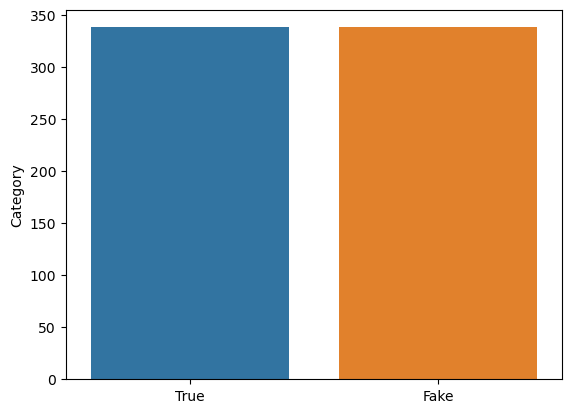

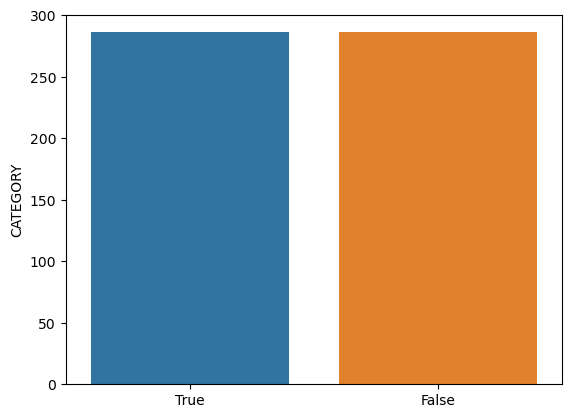

In [10]:
sns.barplot(x=['True', 'Fake'], y=train['Category'].value_counts())
plt.pyplot.show()
sns.barplot(x=['True', 'False'], y=test['CATEGORY'].value_counts())
plt.pyplot.show()

Original training data shape:  (676,)
Number of total text: 1545414


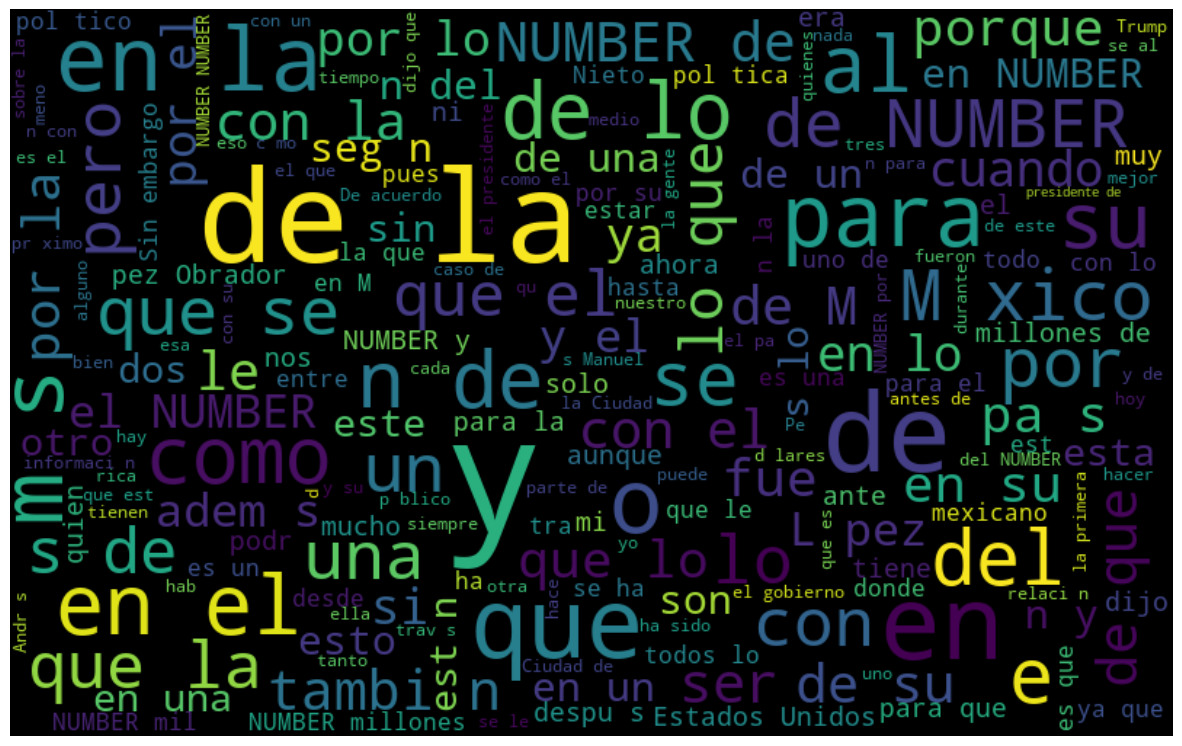

In [11]:
# Combine all training text into one large string
print('Original training data shape: ', train['Text'].shape)
all_text = ' '.join([text for text in train['Text']])
print('Number of total text:', len(all_text))

# Word cloud for entire training dataset
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.pyplot.figure(figsize=(15, 12))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

In [12]:
#remove stopwords

# Clean text before feeding it to spaCy
punctuations = st.punctuation + '¿' + '¡' + '\ufeff1' + '…'

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = esnlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords.words() and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

Original training data shape:  (676,)
Cleaned up training data shape:  (676,)
Original training data shape:  (572,)
Cleaned up training data shape:  (572,)
Number of total text: 1044287


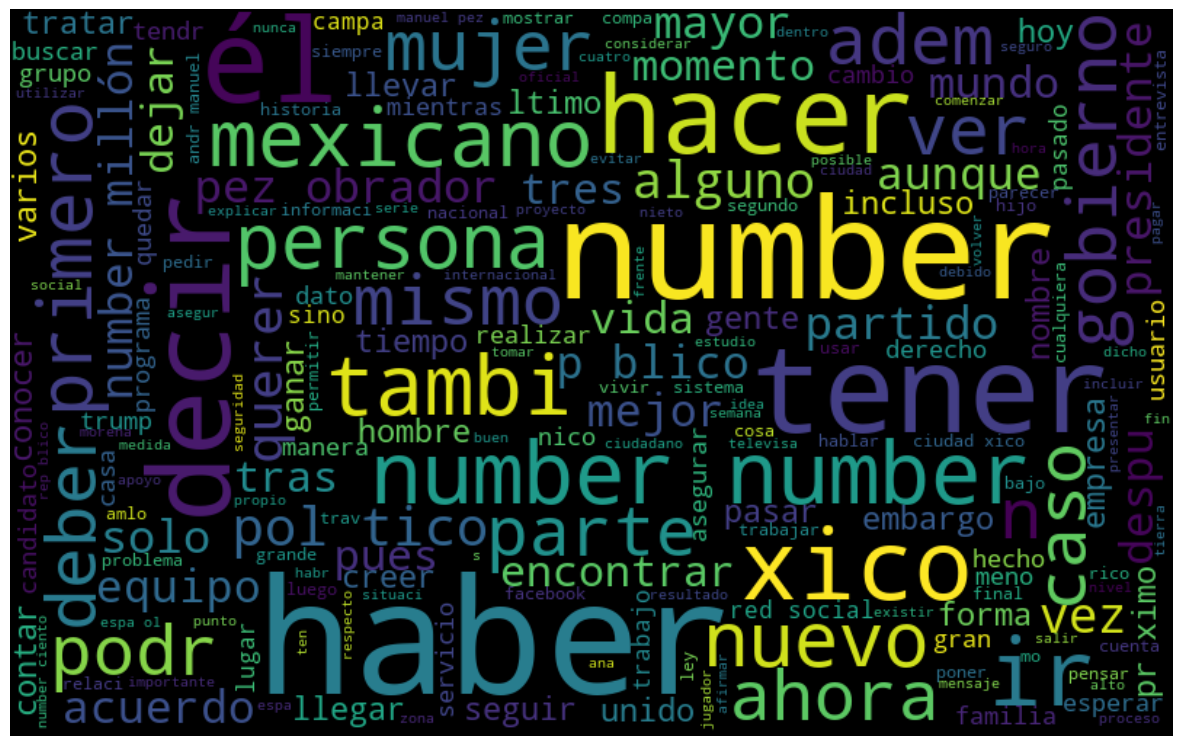

In [13]:
# Cleanup text and make sure it retains original shape
print('Original training data shape: ', train['Text'].shape)
train_cleaned = cleanup_text(train['Text'], logging=True)
print('Cleaned up training data shape: ', train_cleaned.shape)

# Cleanup text and make sure it retains original shape
print('Original training data shape: ', test['TEXT'].shape)
test_cleaned = cleanup_text(test['TEXT'], logging=True)
print('Cleaned up training data shape: ', test_cleaned.shape)

# Combine all training text into one large string
all_text_cleaned = ''.join([text for text in train_cleaned])
print('Number of total text:', len(all_text_cleaned))

# Word cloud for entire training dataset
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text_cleaned)
plt.pyplot.figure(figsize=(15, 12))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

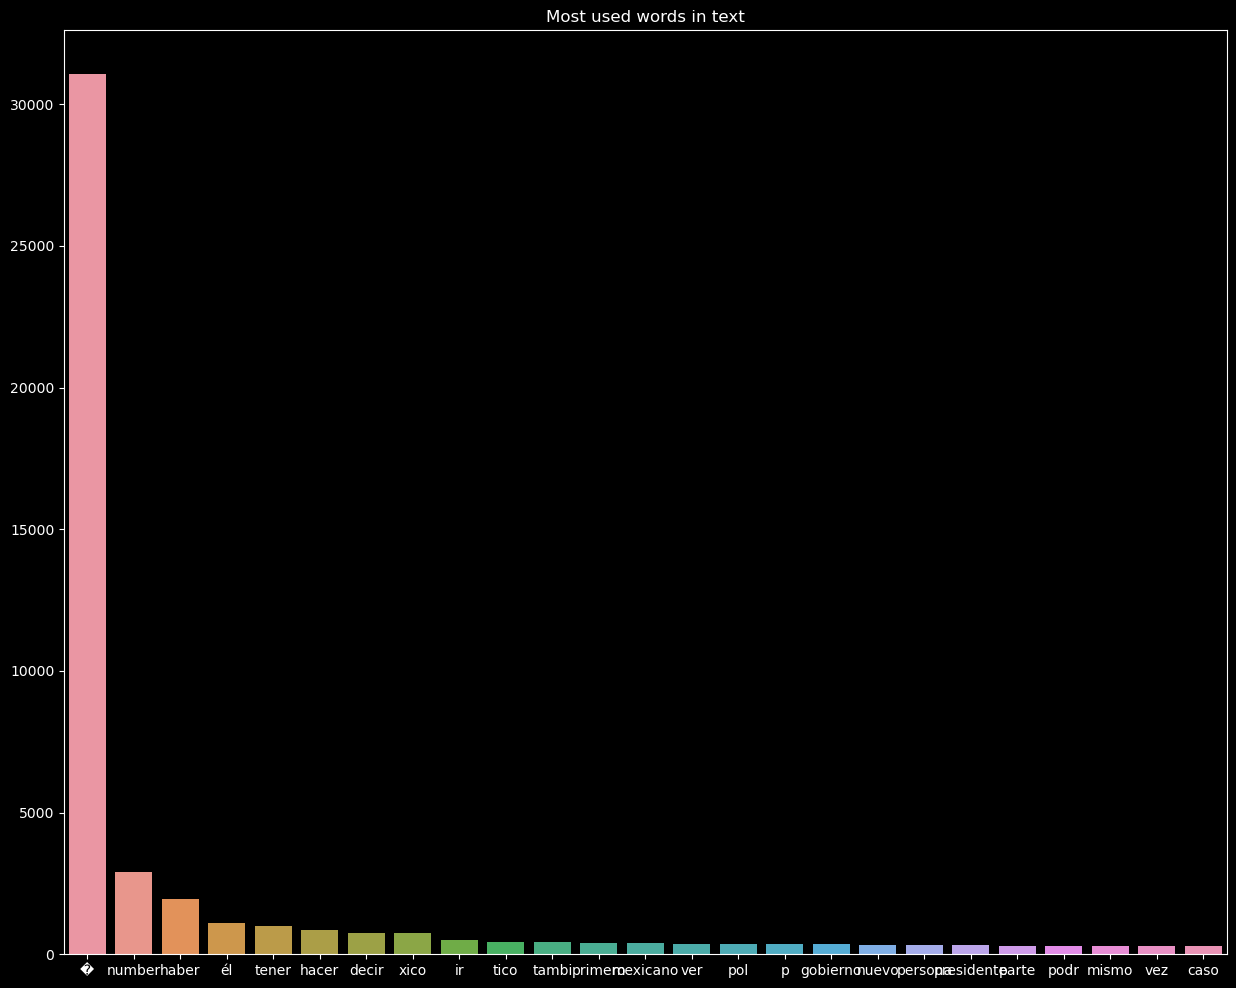

In [14]:
#graph 25 most common words (w/ counts)
all_text = [text for text in train['Text']]
all_text_clean = cleanup_text(all_text)
all_text_clean = ' '.join(all_text_clean).split()
all_text_clean = [word for word in all_text_clean if word != '\'s']
all_text_counts = Counter(all_text_clean)
all_text_common_words = [word[0] for word in all_text_counts.most_common(25)]
all_text_common_counts = [word[1] for word in all_text_counts.most_common(25)]

plt.pyplot.style.use('dark_background')
plt.pyplot.figure(figsize=(15, 12))
sns.barplot(x=all_text_common_words, y=all_text_common_counts)
plt.pyplot.title('Most used words in text')
plt.pyplot.show()

In [15]:
# Parse documents and print some info
print('Parsing documents...')

start = time()

train_vec = []

for doc in esnlp.pipe(train_cleaned, batch_size=500):
    if doc.has_vector:
        train_vec.append(doc.vector)
    # If doc doesn't have a vector, then fill it with zeros.
    else:
        train_vec.append(np.zeros((128,), dtype="float32"))

train_vec = np.array(train_vec)

test_vec = []

for doc in esnlp.pipe(test_cleaned, batch_size=500):
    if doc.has_vector:
        test_vec.append(doc.vector)
    # If doc doesn't have a vector, then fill it with zeros.
    else:
        test_vec.append(np.zeros((128,), dtype="float32"))

test_vec = np.array(test_vec)

end = time()

print('Total time passed parsing documents: {} seconds'.format(end - start))
print('Total number of documents parsed: {}'.format(len(train_vec)))
print('Number of words in first document: ', len(train['Text'][0]))
print('Number of words in last document: ', len(train['Text'][537]))
print('Size of vector embeddings: ', train_vec.shape[1])
print('Shape of vectors embeddings matrix: ', train_vec.shape)

print('Total time passed parsing documents: {} seconds'.format(end - start))
print('Total number of documents parsed: {}'.format(len(test_vec)))
print('Number of words in first document: ', len(test['TEXT'][0]))
print('Number of words in last document: ', len(test['TEXT'][59]))
print('Size of vector embeddings: ', test_vec.shape[1])
print('Shape of vectors embeddings matrix: ', test_vec.shape)

Parsing documents...
Total time passed parsing documents: 31.92263674736023 seconds
Total number of documents parsed: 676
Number of words in first document:  2605
Number of words in last document:  2825
Size of vector embeddings:  300
Shape of vectors embeddings matrix:  (676, 300)
Total time passed parsing documents: 31.92263674736023 seconds
Total number of documents parsed: 572
Number of words in first document:  4576
Number of words in last document:  1021
Size of vector embeddings:  300
Shape of vectors embeddings matrix:  (572, 300)


Using the vectorized training set we can now perform classification modeling

In [16]:
from sklearn.preprocessing import label_binarize

# Transform labels into one hot encoded format.
y_train_ohe = label_binarize(train['Category'], classes=['Fake', 'True'])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_train_ohe[:5])

# Transform labels into one hot encoded format.
y_test_ohe = label_binarize(test['CATEGORY'], classes=['False', 'True'])
print('y_train_ohe shape: {}'.format(y_train_ohe.shape))
print('y_train_ohe samples:')
print(y_test_ohe[:5])

y_train_ohe shape: (676, 1)
y_train_ohe samples:
[[0]
 [0]
 [0]
 [1]
 [0]]
y_train_ohe shape: (676, 1)
y_train_ohe samples:
[[0]
 [0]
 [0]
 [0]
 [0]]


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs')))
models.append(('CART DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 100)))
models.append(('SVM', SVC(gamma = 'scale', probability=True)))

# evaluate each model in turn
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
results6 = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results1 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='accuracy')
    cv_results2 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='neg_log_loss')
    cv_results3 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='roc_auc')
    cv_results4 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='neg_mean_absolute_error')
    cv_results5 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='neg_mean_squared_error')
    cv_results6 = model_selection.cross_val_score(model, train_vec, y_train_ohe[:,0], cv=kfold, scoring='r2')
    results1.append(cv_results1)
    results2.append(cv_results2)
    results3.append(cv_results3)
    results4.append(cv_results4)
    results5.append(cv_results5)
    results6.append(cv_results6)
    names.append(name)
    msg = "%s 'accuracy': %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)
    msg = "%s 'neg_log_loss': %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg)
    msg = "%s 'roc_auc': %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg)
    msg = "%s 'neg_mean_absolute_error': %f (%f)" % (name, cv_results4.mean(), cv_results4.std())
    print(msg)
    msg = "%s 'neg_mean_squared_error': %f (%f)" % (name, cv_results5.mean(), cv_results5.std())
    print(msg)
    msg = "%s 'r2': %f (%f)\n" % (name, cv_results6.mean(), cv_results6.std())
    print(msg)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR 'accuracy': 0.732287 (0.069893)
LR 'neg_log_loss': -0.583180 (0.093628)
LR 'roc_auc': 0.801691 (0.047682)
LR 'neg_mean_absolute_error': -0.267713 (0.069893)
LR 'neg_mean_squared_error': -0.267713 (0.069893)
LR 'r2': -0.091494 (0.289833)

CART DT 'accuracy': 0.649561 (0.065181)
CART DT 'neg_log_loss': -12.570106 (2.558405)
CART DT 'roc_auc': 0.645479 (0.085664)
CART DT 'neg_mean_absolute_error': -0.356431 (0.075221)
CART DT 'neg_mean_squared_error': -0.362489 (0.080617)
CART DT 'r2': -0.464997 (0.323389)

KNN 'accuracy': 0.702766 (0.054310)
KNN 'neg_log_loss': -1.629552 (0.677846)
KNN 'roc_auc': 0.750196 (0.058888)
KNN 'neg_mean_absolute_error': -0.297234 (0.054310)
KNN 'neg_mean_squared_error': -0.297234 (0.054310)
KNN 'r2': -0.211642 (0.227050)

GNB 'accuracy': 0.715891 (0.076740)
GNB 'neg_log_loss': -5.611512 (1.937354)
GNB 'roc_auc': 0.776307 (0.081961)
GNB 'neg_mean_absolute_error': -0.284109 (0.076740)
GNB 'neg_mean_squared_error': -0.284109 (0.076740)
GNB 'r2': -0.159593 (0.32

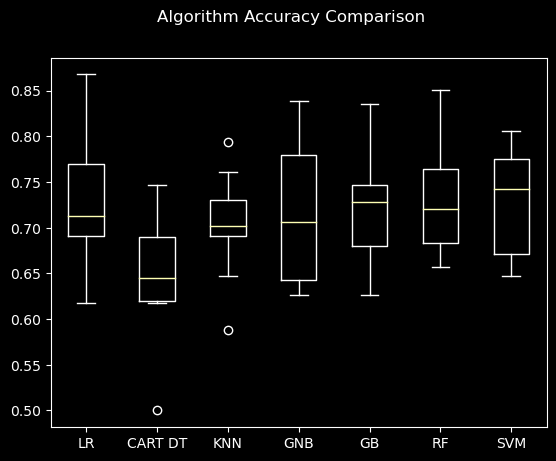

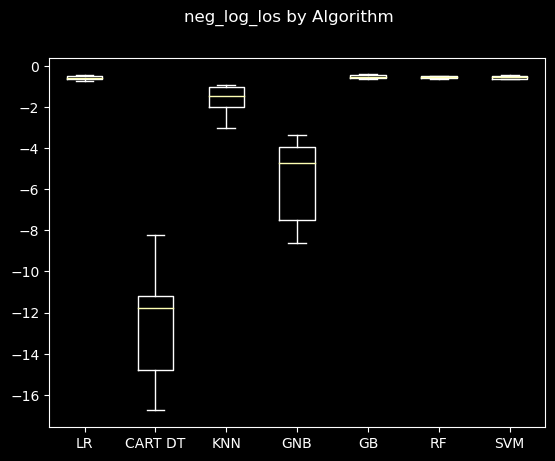

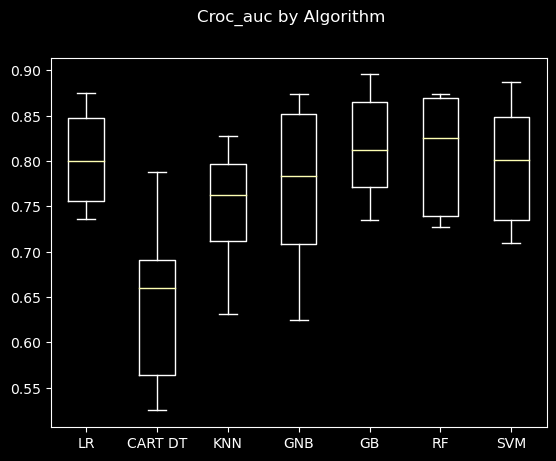

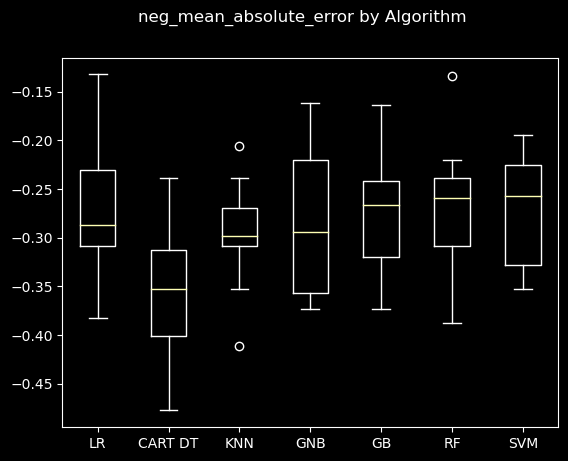

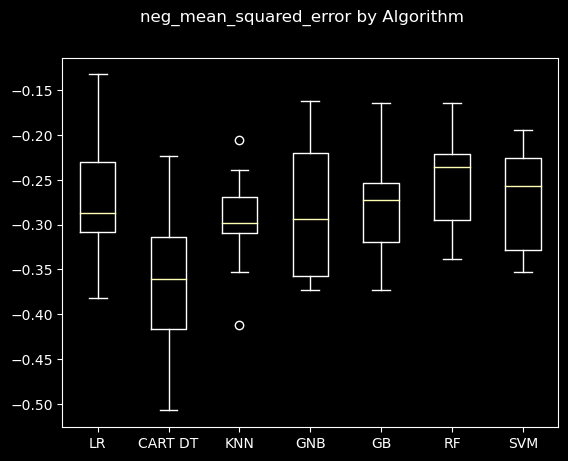

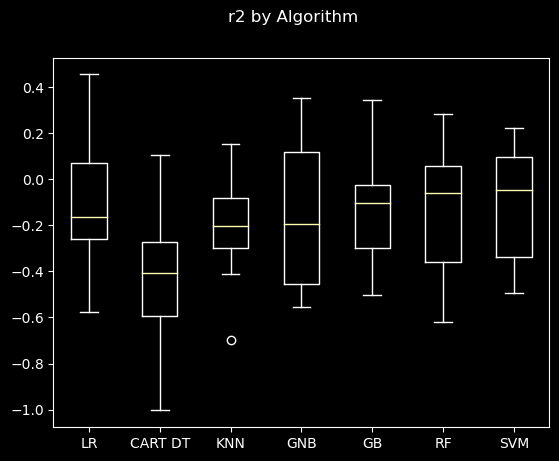

In [18]:
# boxplot algorithm comparison
fig = plt.pyplot.figure()
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results1)
ax.set_xticklabels(names)
plt.pyplot.show()

fig = plt.pyplot.figure()
fig.suptitle('neg_log_los by Algorithm')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results2)
ax.set_xticklabels(names)
plt.pyplot.show()

fig = plt.pyplot.figure()
fig.suptitle('Croc_auc by Algorithm')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results3)
ax.set_xticklabels(names)
plt.pyplot.show()

fig = plt.pyplot.figure()
fig.suptitle('neg_mean_absolute_error by Algorithm')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results4)
ax.set_xticklabels(names)
plt.pyplot.show()

fig = plt.pyplot.figure()
fig.suptitle('neg_mean_squared_error by Algorithm')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results5)
ax.set_xticklabels(names)
plt.pyplot.show()

fig = plt.pyplot.figure()
fig.suptitle('r2 by Algorithm')
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results6)
ax.set_xticklabels(names)
plt.pyplot.show()

Random Forest performs better with 74% accuracy on training data, followed by Logistic Regression at 73%

In [24]:
import pickle

# Save the trained model to a file
with open('randomforest.pkl', 'wb') as file:
    pickle.dump(results1[5], file)